### IMPORTING LIBRARIES

In [2]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt


# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

In [3]:
## READING MICE DATA
mice = pd.read_excel('/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 01 - 05_06_19 - Edited.xlsx')
mice.head()

,Minutes,Date,Time,B6-100 Exp. 1 MRSA Deg. C Data,B6-100 Exp. 1 MRSA Cnts Data,B6-101 Exp. 1 MRSA Deg. C Data,B6-101 Exp. 1 MRSA Cnts Data,CC002-557 Exp. 1 MRSA Deg. C Data,CC002-557 Exp. 1 MRSA Cnts Data,CC002-558 Exp. 1 MRSA Deg. C Data,...,CC015-392 Exp. 1 MRSA Deg. C Data,CC015-392 Exp. 1 MRSA Cnts Data,CC038-582 Exp. 1 MRSA Deg. C Data,CC038-582 Exp. 1 MRSA Cnts Data,CC038-583 Exp. 1 MRSA Deg. C Data,CC038-583 Exp. 1 MRSA Cnts Data,CC051-495 Exp. 1 MRSA Deg. C Data,CC051-495 Exp. 1 MRSA Cnts Data,CC051-496 Exp. 1 MRSA Deg. C Data,CC051-496 Exp. 1 MRSA Cnts Data
0,1,2019-04-26,13:10:47,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2,2019-04-26,13:11:47,NaN,69.0,NaN,19.0,NaN,37.0,NaN,...,NaN,77.0,NaN,38.0,NaN,39.0,NaN,74.0,NaN,31.0
2,3,2019-04-26,13:12:47,37.54,8.0,37.82,46.0,37.50,60.0,37.79,...,39.34,64.0,38.80,42.0,38.37,67.0,38.16,39.0,38.02,19.0
3,4,2019-04-26,13:13:47,37.56,0.0,37.74,35.0,37.64,18.0,37.78,...,39.35,48.0,38.76,26.0,38.31,22.0,38.18,38.0,38.10,47.0
4,5,2019-04-26,13:14:47,37.50,0.0,37.74,62.0,37.77,13.0,37.72,...,39.36,20.0,38.59,15.0,38.25,23.0,38.16,45.0,38.14,34.0


Text(0, 0.5, 'Temperature (°C)')

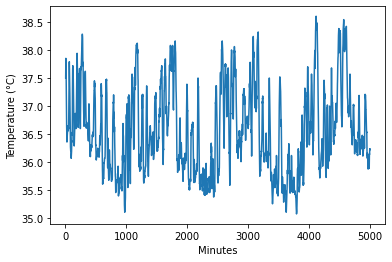

In [72]:
## Selecting columns and the first 5000 rows then plotting 
x = mice["Minutes"]
y = mice.iloc[:,7] #selecting CC002-557 Exp. 1 MRSA Deg. C Data

plt.plot(x[:5000],y[:5000])
plt.xlabel("Minutes") #x label
plt.ylabel("Temperature (°C)") #y label

Text(0, 0.5, 'Temperature (Celsius)')

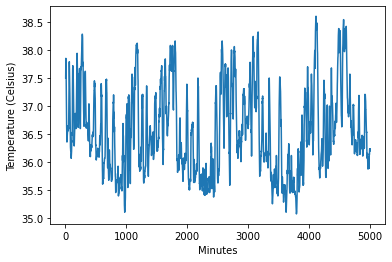

In [73]:
mask = y.notna() # will keep the true values
x1 = x[mask]
y1 = y[mask]
plt.plot(x1[:5000],y1[:5000])
plt.xlabel("Minutes") #x label
plt.ylabel("Temperature (Celsius)") #y label

In [74]:
# Want to measure how many values were removed
len(x)-len(x1) #we got rid of 5842 data points

5842

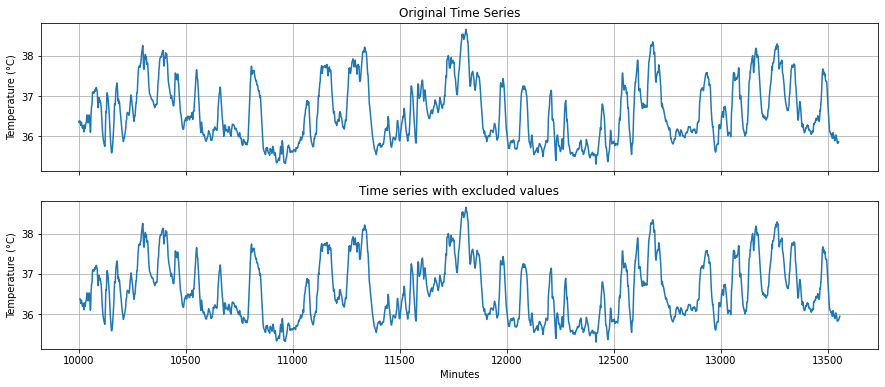

In [75]:
fig,ax = plt.subplots(2,1,figsize=(15,6), sharex = True)
fig.set_facecolor("white") # Changing the border to white

ax[0].plot(x[10000:13550],y[10000:13550])
ax[0].set_ylabel("Temperature (°C)")
ax[0].set_title("Original Time Series")
ax[0].grid()
ax[1].plot(x1[10000:13550],y1[10000:13550])
ax[1].set_xlabel("Minutes")
ax[1].set_ylabel("Temperature (°C)")
ax[1].set_title("Time series with excluded values")
ax[1].grid()

## Time Delay Embedding

In [87]:
#TDE on original data
Z = tde.tde(y)
Z = Z.T
Z

#TDE on the data that had values excluded
#X = tde.tde(y1)
#X=X.T #transporting the data


array([[36.21, 36.62,   nan],
       [36.2 , 36.63,   nan],
       [36.15, 36.65, 37.5 ],
       ...,
       [  nan,   nan,   nan],
       [  nan,   nan,   nan],
       [  nan,   nan,   nan]])

## Train Test Split


In [88]:
# ORIGINAL DATA
#importing the model
model_1 = svm.OneClassSVM()

#fit the data
model_1.fit(Z[:5000,:])

#predict the data
predict_1 = model_1.predict(Z[5001:,:])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [83]:
# WITH EXCLUDED VALUES
#importing the model
model_2 = svm.OneClassSVM()

#fit the data
model_2.fit(X[:5000,:])

#predict the data
predict_2 = model_2.predict(X[5001:,:])

#creating a second mask in which outliers = -1
#mask1 = outliers == -1
#Xmask = X[5001:][mask1]

## Applying SVM

In [84]:
#plotting the scatterplot
plt.scatter(Z[5001:,0],Z[5001:,1], c = predict_1)

NameError: name 'predict_1' is not defined

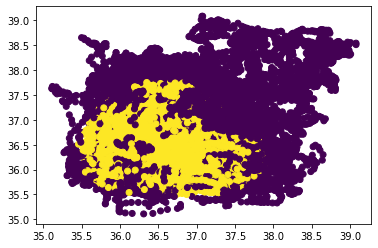

In [85]:
#plotting the scatterplot
plt.scatter(X[5001:,0],X[5001:,1], c = predict_2)

In [31]:
predict_2 #-1 outliers, 1 inliers (nonanomaly)

array([ 1,  1,  1, ..., -1, -1, -1])

## Scoring 

In [32]:
scores = model.score_samples(X[5001:,:])
scores

array([646.38576184, 648.31132953, 647.36152957, ..., 377.67529811,
       386.60324728, 397.89230694])

(-1.2, 1.2)

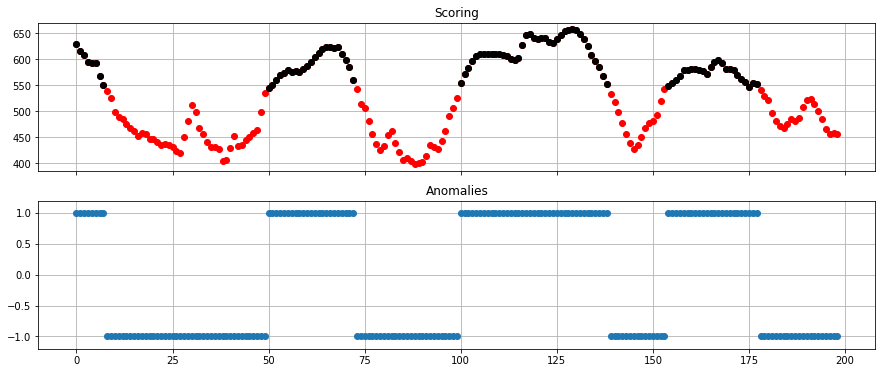

In [70]:
fig,ax = plt.subplots(2, 1, figsize=(15,6), sharex = True)

#plt.plot(scores,'o')
ax[0].plot(scores[5001:5200], 'o', color='red')  # Plot the scores with blue color
ax[0].grid()
ax[0].set_title("Scoring")

# Find the indices of the anomalies
anomaly_indices = [index for index, value in enumerate(predict[5001:5200]) if value != -1]

# Plot the anomalies with red color
ax[0].plot(anomaly_indices, scores[5001:5200][anomaly_indices], 'o', color='black')

ax[1].plot(predict[5001:5200], 'o')
ax[1].grid()
ax[1].set_title("Anomalies")
ax[1].set_ylim(-1.2, 1.2)


## The x axis starts at 0-200, how do I fix?

## Ignore

In [34]:
xtime=x1[5001:]

ValueError: 'c' argument has 12832 elements, which is inconsistent with 'x' and 'y' with size 16000.

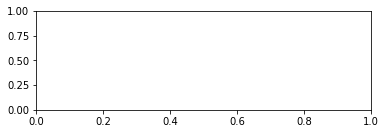

In [35]:
plt.subplot(2, 1, 1)
#plt.plot(predict,'o')
plt.scatter(x1[0:16000],y1[0:16000],c=predict[0:16000])
plt.grid()
plt.title("Anomolies")

plt.subplot(2, 1, 2)
#plt.plot(scores,'o')
plt.plot(x1[0:16000],scores[0:16000])
plt.grid()
plt.title("Scoring")



ValueError: x and y must have same first dimension, but have shapes (13552,) and (12832,)

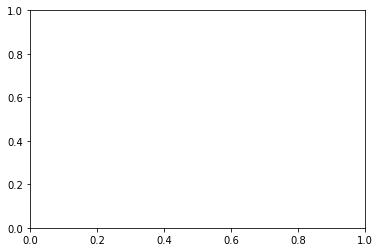

In [36]:
plt.plot(xtime,predict)

In [37]:
(len(X)-5000)/len(X) #This is only showing 78.7% of the data for one mice 

0.7196209274939719

In [38]:
#plt.scatter(X[5001:,1],X[5001:,2], c = outliers)

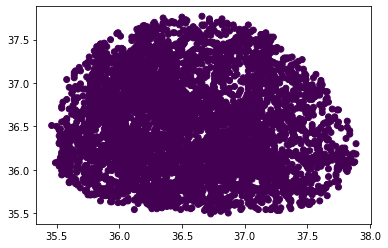

In [39]:
#nonanomaly = outliers ==1
nonanomoly = predict == 1
x_nonanomoly = X[5001:,:][nonanomoly]
plot_nonanom= plt.scatter(x_nonanomoly[:, 0], x_nonanomoly[:, 1], c=predict[nonanomoly])

In [40]:
#anomaly = outliers ==-1
anomoly = outliers == -1
x_anomoly = X[5001:,][anomoly]
plot_anom= plt.scatter(x_anomoly[:, 0], x_anomoly[:, 1], c="red")

NameError: name 'outliers' is not defined

In [41]:
#plt.plot(x1[5001:], X[5001:])
len(x1)

18553

In [42]:
len()

TypeError: len() takes exactly one argument (0 given)

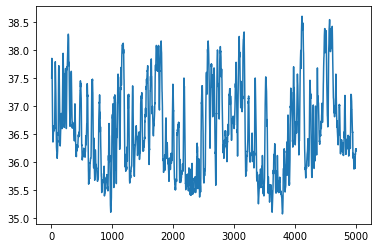

In [43]:
plt.plot(x1[:5000],y1[:5000])

In [44]:
plt.plot(x1[5001:],y1[5001:], c=outliers[x_anomoly])

NameError: name 'outliers' is not defined

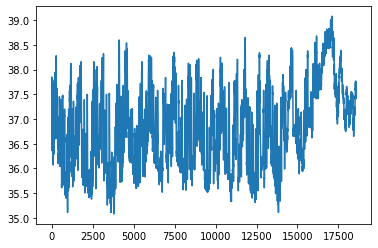

In [45]:
plt.plot(x1[:],y1[:])